# Métodos Não Paramétricos

Neste   capítulo   vamos estudarmétodos estatísticos   não paramétricos, que   são alternativas quando as suposições dos métodos paramétricos não são atendidas.

### O que são testes Não Paramétricos?

Testes estatísticos não paramétricos são métodos de análise que não assumem uma distribuição específica dos dados, como a normalidade, que é frequentemente uma suposição em testes paramétricos.

Eles são particularmente úteis quando você tem dados que não atendem às suposições necessárias para os testes paramétricos, como dados com distribuições desconhecidas, dados ordinais ou dados com muitos valores atípicos.

Esses testes são baseados na ordem ou no ranking dos dados, em vez de seus valores exatos. Isso os torna robustos contra desvios de distribuições específicas e minimiza o impacto de outliers.

Alguns dos testes não paramétricos mais conhecidos incluem o teste de Wilcoxon, o teste de Mann-Whitney, o teste de Kruskal-Wallis e o teste de Friedman, além do coeficiente de correlação de Spearman. Esses testes são aplicados em diversas situações, como comparar medianas de dois ou mais grupos, testar hipóteses sobre a associação entre variáveis categóricas, entre outras aplicações.

## Quando Usar Testes Não Paramétricos?

Testes não paramétricos são uma ferramenta estatística essencial que você pode usar em diversas situações onde os testes paramétricos podem não ser adequados. Aqui estão alguns dos principais cenários e considerações para decidir quando usar testes não paramétricos:

**1. Distribuição dos Dados**

Quando os dados não seguem uma distribuição normal (ou qualquer outra distribuição específica assumida por testes paramétricos), os testes não paramétricos são uma opção viável. Isso é comum com amostras pequenas, onde é difícil verificar a normalidade, ou com dados que são claramente assimétricos ou têm outliers significativos.

**2. Tamanho da Amostra**

Testes não paramétricos são particularmente úteis em situações com amostras pequenas. Eles não dependem do Teorema Central do Limite, que é a base para muitos testes paramétricos que assumem uma distribuição normal nas amostras maiores. Assim, para amostras pequenas, testes não paramétricos podem fornecer análises mais confiáveis.

**3. Nível de Medida dos Dados**

Quando os dados são ordinais ou nominais (categóricos), os testes não paramétricos são geralmente necessários, pois os testes paramétricos geralmente requerem dados de intervalo ou de razão (numéricos) que suportem operações aritméticas como média e desvio padrão.

**4. Robustez contra Violações de Suposições**

Testes não paramétricos não são tão sensíveis a outliers e outros tipos de violações de suposições como homogeneidade de variâncias (homocedasticidade) que são críticas para testes paramétricos. Se você suspeita que seus dados podem violar essas suposições, os testes não paramétricos podem fornecer resultados mais confiáveis.

**5. Modelagem de Dados**

Em análises onde a forma funcional da relação entre variáveis não é conhecida ou é muito complexa, os métodos não paramétricos podem fornecer modelos flexíveis sem a necessidade de especificar uma forma funcional a priori, como é o caso da regressão não paramétrica (que aplicaremos no Projeto 9 do curso).

In [3]:
!pip install -q scikit-posthocs

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import spearmanr
from scipy.stats import shapiro

## Teste de Wilcoxon

O teste de Wilcoxon é uma alternativa não paramétrica ao teste t. Ele é usado para comparar duas amostras relacionadas quando não se pode assumir que a diferença entre as amostras segue uma distribuição normal. 

Vejamos um exemplo. Temos amostras de tamanhos de plantas antes e depois do uso de fertilizantes. Não conhecemos a distribuição dos dados.

In [18]:
# Gerando dados que não seguem uma distribuição normal

# Para reprodutibilidade
np.random.seed(297)  

# Dados antes de usar fertilizante
# Utilizando uma distribuição exponencial, comumente usada para modelar tempos de espera
dados_antes = np.random.exponential(scale = 10, size = 10) + 15  

# Dados depois de usar fertilizante
# Utilizando uma mistura de distribuições para aumentar a assimetria
dados_depois = np.concatenate([np.random.exponential(scale = 15, size = 5),  
                               np.random.exponential(scale = 5, size = 5)]) + 20  

# Adicionando um pequeno ruído para evitar zeros nas diferenças
ruido = np.random.normal(0, 0.01, size = dados_antes.shape)
dados_depois_modificados = dados_depois + ruido

In [19]:
# Teste de Shapiro-Wilk para verificar a normalidade
stat_A, p_A = shapiro(dados_antes)
stat_B, p_B = shapiro(dados_depois_modificados)

print(f"Amostra A - Estatística: {stat_A:.4f}, p-valor: {p_A:.4f}")
print(f"Amostra B- Estatística: {stat_B:.4f}, p-valor: {p_B:.4f}")

Amostra A - Estatística: 0.7869, p-valor: 0.0101
Amostra B- Estatística: 0.6200, p-valor: 0.0001


In [20]:
# Interpretando os resultados do Teste de Shapiro-Wilk

nivel_significancia = 0.05

if p_A > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.")

if p_B > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.")

Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.
Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.


In [21]:
# Aplicação do teste de Wilcoxon
stat, p = wilcoxon(dados_antes, dados_depois_modificados)

O teste de Wilcoxon testa duas hipóteses sobre as diferenças entre os pares de observações nas duas amostras relacionadas. Aqui estão as hipóteses:

**Hipótese Nula (H0)**: Não há diferença mediana entre os pares de grupos. Isso significa que a mediana das diferenças entre os pares de amostras é zero. Em termos mais técnicos, a hipótese nula afirma que a distribuição da diferença entre os pares é simétrica em torno de zero.

**Hipótese Alternativa (H1 ou Ha)**: Existe uma diferença mediana entre os pares de grupos. A mediana das diferenças entre os pares de amostras não é zero, indicando que uma das amostras tende a ter valores maiores ou menores que a outra. Esta hipótese pode ser bidirecional (simplesmente indicando que as medianas são diferentes) ou unidirecional (especificando se a mediana da primeira amostra é maior ou menor que a da segunda).

In [22]:
print("Estatística do Teste:", stat)
print("Valor-p:", p)

Estatística do Teste: 21.0
Valor-p: 0.556640625


In [ ]:
# Interpretação do resultado
if p > 0.05:
    print("Não há evidências suficientes para rejeitar a hipótese nula (as medianas provavelmente são iguais).")
    print("Logo, não há difSerença significativa no tamanho das amostras.")
else:
    print("Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).")

Não há evidências suficientes para rejeitar a hipótese nula (as medianas provavelmente são iguais).
Logo, não há diferença significativa no tamanho das amostras.


## Teste Mann-Whitney

O Teste Mann-Whitney, também conhecido como Teste U de Mann-Whitney, é um teste estatístico  não  paramétrico  que  é  utilizado  para  comparar  duas  amostras  independentes.
Alternativa a ANOVA.

### Exemplo 1

Neste exemplo, geramos duas amostras hipotéticas (amostra1 e amostra2) e aplicamos o Teste Mann-Whitney utilizando a função mannwhitneyu da biblioteca SciPy. O resultado inclui a estatística U e o valor-p. O valor-p é utilizado para determinar se há diferença significativa entre as distribuições das duas amostras. 

Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que as distribuições das duas amostras são significativamente diferentes. Caso contrário, não se pode rejeitar a hipótese nula.

Hipóteses:
- H0: Não há diferença significativa entre as distribuições das amostras
- H1: As distribuições das amostras são significativamente diferentes

In [35]:
# Exemplo de duas amostras independentes
amostra1 = np.array([3, 5, 7, 9, 11, 15, 18, 21])
amostra2 = np.array([1, 4, 6, 8, 10, 12, 14, 16])

# Realiza o Teste Mann-Whitney
resultado = mannwhitneyu(amostra1, amostra2)

# Exibe o resultado
print("Estatística U:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística U: 38.0
Valor-p: 0.5737373737373737


**Conclusão:** O valor-p é maior que o nível de significância (0,05), logo falhamos em rejeitar a H0. Não há diferença significativa entre as distribuições das amostras.

### Exemplo 2

Neste exemplo, geramos duas amostras com distribuições normais distintas: amostra1 possui média 10 e desvio padrão 3, enquanto amostra 2 possui média 14 e desvio padrão 2.
Em seguida, aplicamos o **Teste Mann-Whitney** utilizando a função `mannwhitneyu` e exibimos os resultados.

O valor-p resultante do Teste Mann-Whitney pode ser usado para avaliar se as duas amostras têm distribuições significativamente diferentes, considerando um nível de significância pré-estabelecido (como 0,05). Se o valor-p for menor que o nível de significância, rejeita-se a hipótese nula e conclui-se que as distribuições são significativamente diferentes.

Hipóteses:
 - H0: Não há diferença significativa entre as distribuições das amostras
 - H1: As distribuições das amostras são significativamente diferentes

In [ ]:
# Gera duas amostras com distribuições diferentes
np.random.seed(29)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 50)
amostra2 = np.random.normal(loc = 14, scale = 2, size = 60)

# Realiza o Teste Mann-Whitney
resultado = mannwhitneyu(amostra1, amostra2)

# Exibe o resultado
print("Estatística U:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística U: 530.0
Valor-p: 5.887908229286127e-09


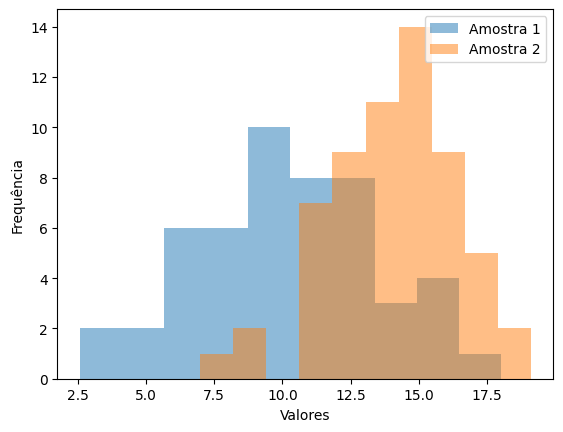

In [34]:
# Visualiza as distribuições das amostras
plt.hist(amostra1, bins = 10, alpha = 0.5, label = "Amostra 1")
plt.hist(amostra2, bins = 10, alpha = 0.5, label = "Amostra 2")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend(loc="upper right")
plt.show()

**Conclusão:** O valor-p é menor que o nível de significância, logo podemos rejeitar a H0. As distribuições das amostras são significativamente diferentes.